## Necessary package importation

In [19]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib

from sklearn.model_selection import train_test_split


from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.preprocessing import LabelEncoder


In [20]:
# Load the dataset
data = pd.read_excel('QualityOfCare.xlsx')

# Display the first few rows of the dataset
display(data.head())

# Display the dataset shape
display(data.shape)

,Health facility level,FacilityType,FundingSources,DateOfBirth,Age,AgeInMonths,Sex,MaritalStatus,EducationLevel,Occupation,...,MostRecentCd4Count,ViralLoadDone,PregnancyStatus,ArtInterruptionType,ArtInterruptionDate,ArtInterruptionReason,OpportunisticInfectionAtLastVisit,OpportunisticInfectionAtLastVisitOthers,CurrentRegimen,ViralLoad
0,Secondary health facility,Public,",Federal Government,Non-Governmental Organisation",1955-12-04 00:00:00,50.0,NaN,Male,Married,Primary,Civil servant,...,416.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,First-line Regimen,<20
1,Secondary health facility,Public,",Non-Governmental Organisation",27/1/1983,32.0,NaN,Female,Married,Secondary,Unemployed,...,436.0,Yes,Non-oregnancy,NaN,NaN,NaN,",Fever,Cough",NaN,First-line Regimen,17238
2,Secondary health facility,Public,",State Government",16/12/1985,27.0,NaN,Female,Married,Others,Unemployed,...,699.0,Yes,Non-oregnancy,Default,26/4/2016,Not stated,NaN,NaN,First-line Regimen,<20cp/ml
3,Secondary health facility,Faith Based,",Non-Governmental Organisation",1968-07-08 00:00:00,48.0,NaN,Female,Missing,Missing,NaN,...,154.0,Yes,Non-oregnancy,NaN,NaN,NaN,",Fever",NaN,First-line Regimen,89
4,Tertiary hospital,Public,",Federal Government",1985-01-01 00:00:00,28.0,NaN,Female,Single,Secondary,Self employed,...,512.0,Yes,Non-oregnancy,NaN,NaN,NaN,NaN,NaN,First-line Regimen,83


(27288, 46)

In [21]:
# Get a summary of the dataset
display(data.info())

# Get basic statistics
display(data.describe())

# Check for missing values
display(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27288 entries, 0 to 27287
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Health facility level                     27288 non-null  object 
 1   FacilityType                              27288 non-null  object 
 2   FundingSources                            27196 non-null  object 
 3   DateOfBirth                               24493 non-null  object 
 4   Age                                       26569 non-null  float64
 5   AgeInMonths                               642 non-null    float64
 6   Sex                                       27288 non-null  object 
 7   MaritalStatus                             25547 non-null  object 
 8   EducationLevel                            24638 non-null  object 
 9   Occupation                                24610 non-null  object 
 10  DateOfConfirmedHIV                

None

,Age,AgeInMonths,WeightAtStart,HeightAtStart,Cd4AtStart,WeightAtLastVisit,HeightAtLastVisit,MostRecentCd4Count
count,2.656900e+04,642.000000,25065.000000,15357.000000,21906.000000,24444.000000,15231.000000,20106.000000
mean,1.095590e+02,14.890966,54.920870,142.788071,451.511158,60.014575,144.670872,654.213839
std,1.215949e+04,80.235363,17.123884,51.772227,6625.037637,30.309822,335.184395,7467.950481
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.700000e+01,0.000000,47.000000,150.000000,139.000000,50.000000,150.000000,229.000000
50%,3.400000e+01,2.000000,55.000000,160.000000,267.000000,60.000000,160.000000,396.000000
75%,4.200000e+01,18.000000,65.000000,166.000000,434.000000,69.000000,166.000000,600.000000
max,1.982014e+06,1987.000000,100.000000,980.000000,662645.000000,1248.000000,40914.000000,578566.000000


Health facility level                           0
FacilityType                                    0
FundingSources                                 92
DateOfBirth                                  2795
Age                                           719
AgeInMonths                                 26646
Sex                                             0
MaritalStatus                                1741
EducationLevel                               2650
Occupation                                   2678
DateOfConfirmedHIV                            714
DateOfEnrollment                              592
CareEntryPoint                               1854
DateArtStarted                                  0
RegimenAtStart                                666
WeightAtStart                                2223
HeightUnit                                   9443
HeightAtStart                               11931
FunctionalStatusAtStart                       770
ClinicalStageAtStart                         1158


## Data Cleaning

In [22]:
#filter out columns that are not needed and columns with too many empty rows
clean_data = data[['FacilityType', 'Age', 'Sex', 'MaritalStatus',
       'EducationLevel', 'Occupation', 
       'RegimenAtStart', 'WeightAtStart', 'HeightUnit', 'HeightAtStart', 'ClinicalStageAtStart', 
       'Cd4AtStart', 'AdherenceCouncelingCompleted', 'InitialTbScreeningDone', 
       'ClinicalStageAtLastVisit', 'PatientDead',
       'AnySideEffects', 
       'MostRecentCd4Count', 'PregnancyStatus', 'CurrentRegimen',
       'ViralLoad']].dropna(how = 'any')


#correcting the spelling issue with the pregnancy status column
clean_data['PregnancyStatus'] = np.where(clean_data['PregnancyStatus']=='Non-oregnancy', 'Not Pregnant', clean_data['PregnancyStatus'])

#Filtering out rows with age higher than 100
clean_data = clean_data[clean_data['Age']<=100]

#Removing Alphabet characters in the ViralLoad column to leave only numbers
clean_data['ViralLoad'] = clean_data['ViralLoad'].str.replace(r'[^0-9]', '', regex=True)
clean_data['ViralLoad'] = pd.to_numeric(clean_data['ViralLoad'])


In [23]:
#Getting the general column information of the cleaned dataset
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3471 entries, 1 to 17841
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   FacilityType                  3471 non-null   object 
 1   Age                           3471 non-null   float64
 2   Sex                           3471 non-null   object 
 3   MaritalStatus                 3471 non-null   object 
 4   EducationLevel                3471 non-null   object 
 5   Occupation                    3471 non-null   object 
 6   RegimenAtStart                3471 non-null   object 
 7   WeightAtStart                 3471 non-null   float64
 8   HeightUnit                    3471 non-null   object 
 9   HeightAtStart                 3471 non-null   float64
 10  ClinicalStageAtStart          3471 non-null   object 
 11  Cd4AtStart                    3471 non-null   float64
 12  AdherenceCouncelingCompleted  3471 non-null   object 
 13  Initial

In [24]:
#Checking the category distribution for each column
cols = ['FacilityType', 'Sex', 'MaritalStatus',
       'EducationLevel', 'Occupation',
       'RegimenAtStart', 'HeightUnit', 'ClinicalStageAtStart', 
    'AdherenceCouncelingCompleted', 'InitialTbScreeningDone', 
       'ClinicalStageAtLastVisit',
       'AnySideEffects', 
        'PregnancyStatus', 'CurrentRegimen',
       'ViralLoad']

for i in cols:
    display(clean_data[i].value_counts())

FacilityType
Public                    2906
Faith Based                506
Private for profit          52
Private not for profit       7
Name: count, dtype: int64

Sex
Female    3463
Male         8
Name: count, dtype: int64

MaritalStatus
Married       2158
Single         727
Widowed        282
Missing        163
Seperated       70
Divorced        68
Cohabiting       3
Name: count, dtype: int64

EducationLevel
Secondary       1280
Missing          680
Primary          650
Tertiary         490
No Education     289
Others            82
Name: count, dtype: int64

Occupation
Unemployed         1066
Self employed      1006
Business person     807
Civil servant       299
Student             293
Name: count, dtype: int64

RegimenAtStart
TDF-3TC-EFV      2352
AZT-3TC-NVP       684
AZT-3TC-EFV       127
TDF-3TC-NVP       120
TDF-FTC-EFV       107
ABC-3TC-EFV        21
TDF-FTC-NVP        20
TDF-3TC-LPV/r      10
TDF-3TC-ATV/r       6
ABC-3TC-LPV/r       5
TRV/EFV             5
AZT-3TC-TDF         5
AZT-3TC-ABC         2
TDF-FTC-ATV/r       2
ABC-3TC-NVP         2
ABC-3TC-ddi         1
ddi-3TC-NVP         1
AZT-3TC-ATV/r       1
Name: count, dtype: int64

HeightUnit
cm    2804
m      667
Name: count, dtype: int64

ClinicalStageAtStart
I      2066
II      792
III     555
IV       58
Name: count, dtype: int64

AdherenceCouncelingCompleted
Yes    3410
No       61
Name: count, dtype: int64

InitialTbScreeningDone
Yes    3223
No      248
Name: count, dtype: int64

ClinicalStageAtLastVisit
I      2659
II      560
III     225
IV       27
Name: count, dtype: int64

AnySideEffects
No     3351
Yes     120
Name: count, dtype: int64

PregnancyStatus
Not Pregnant    3262
Pregnant         209
Name: count, dtype: int64

CurrentRegimen
First-line Regimen     3407
Second-line Regimen      62
Salvage Regimen           2
Name: count, dtype: int64

ViralLoad
20.0      1327
10.0        41
150.0       16
40.0         9
27.0         7
          ... 
476.0        1
77.0         1
1545.0       1
215.0        1
425.0        1
Name: count, Length: 252, dtype: int64

## Data Analysis

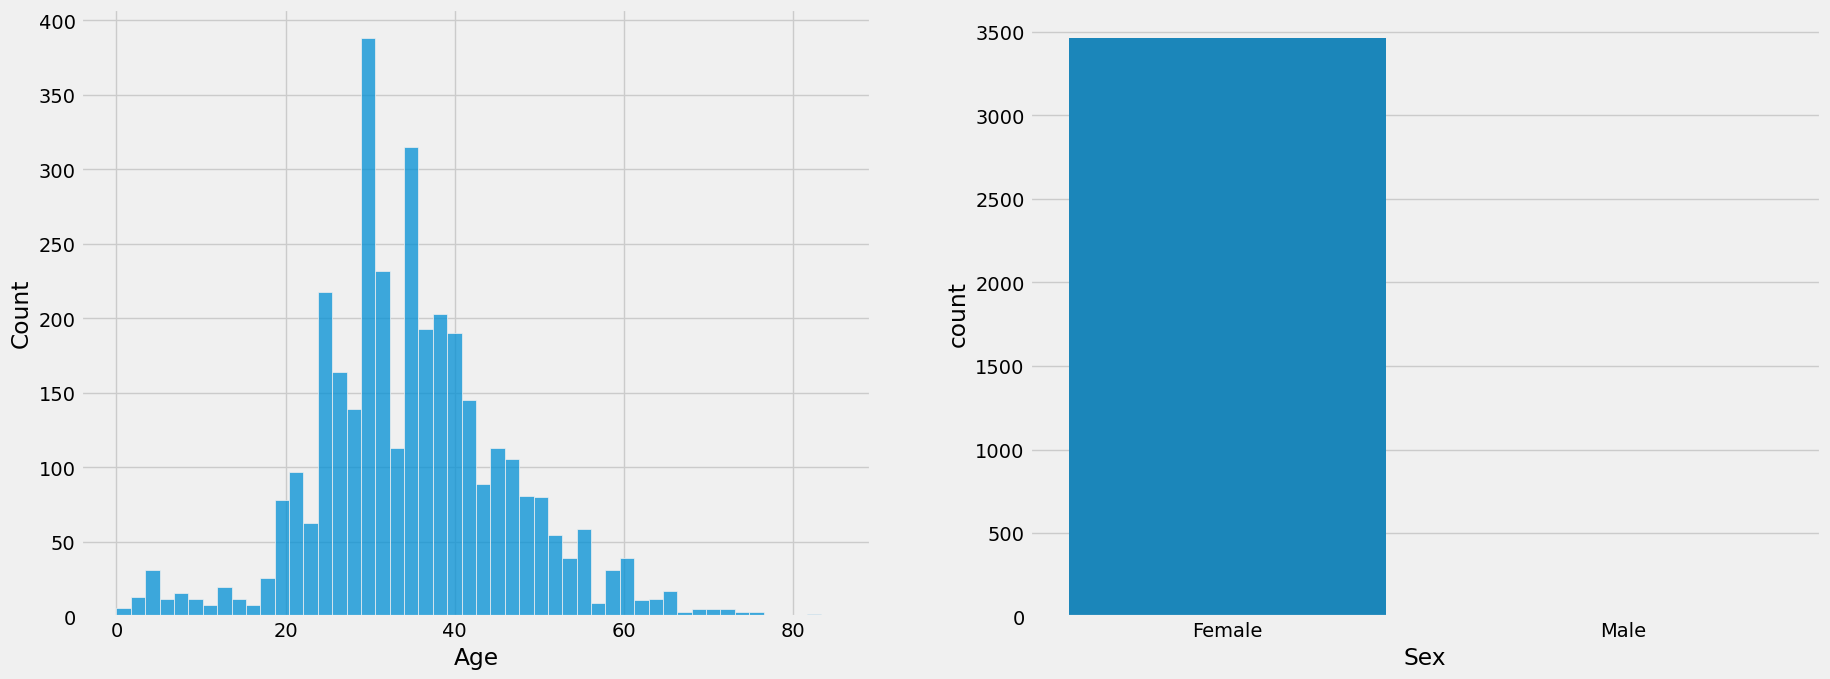

In [25]:
#Plotting the age and sex distribution
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1, 2)
fig.set_size_inches([20,7.5])

sns.histplot(clean_data, x = 'Age', ax= ax[0])
sns.countplot(clean_data, x = 'Sex', ax = ax[1])
plt.show()

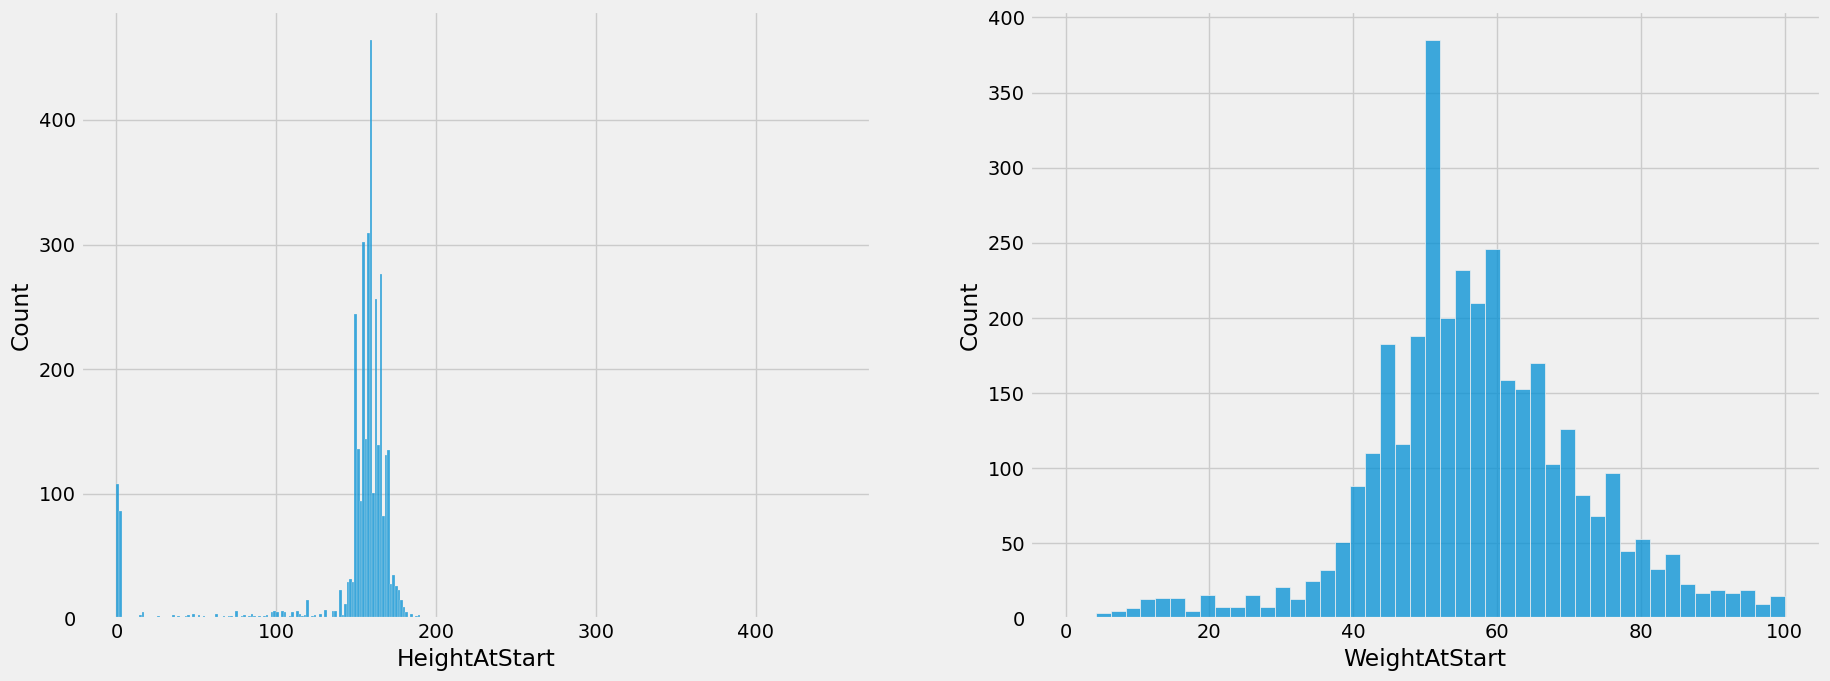

In [26]:
#Plotting the age and sex distribution
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1, 2)
fig.set_size_inches([20,7.5])

sns.histplot(clean_data, x = 'HeightAtStart', ax= ax[0])
sns.histplot(clean_data, x = 'WeightAtStart', ax = ax[1])
plt.show()

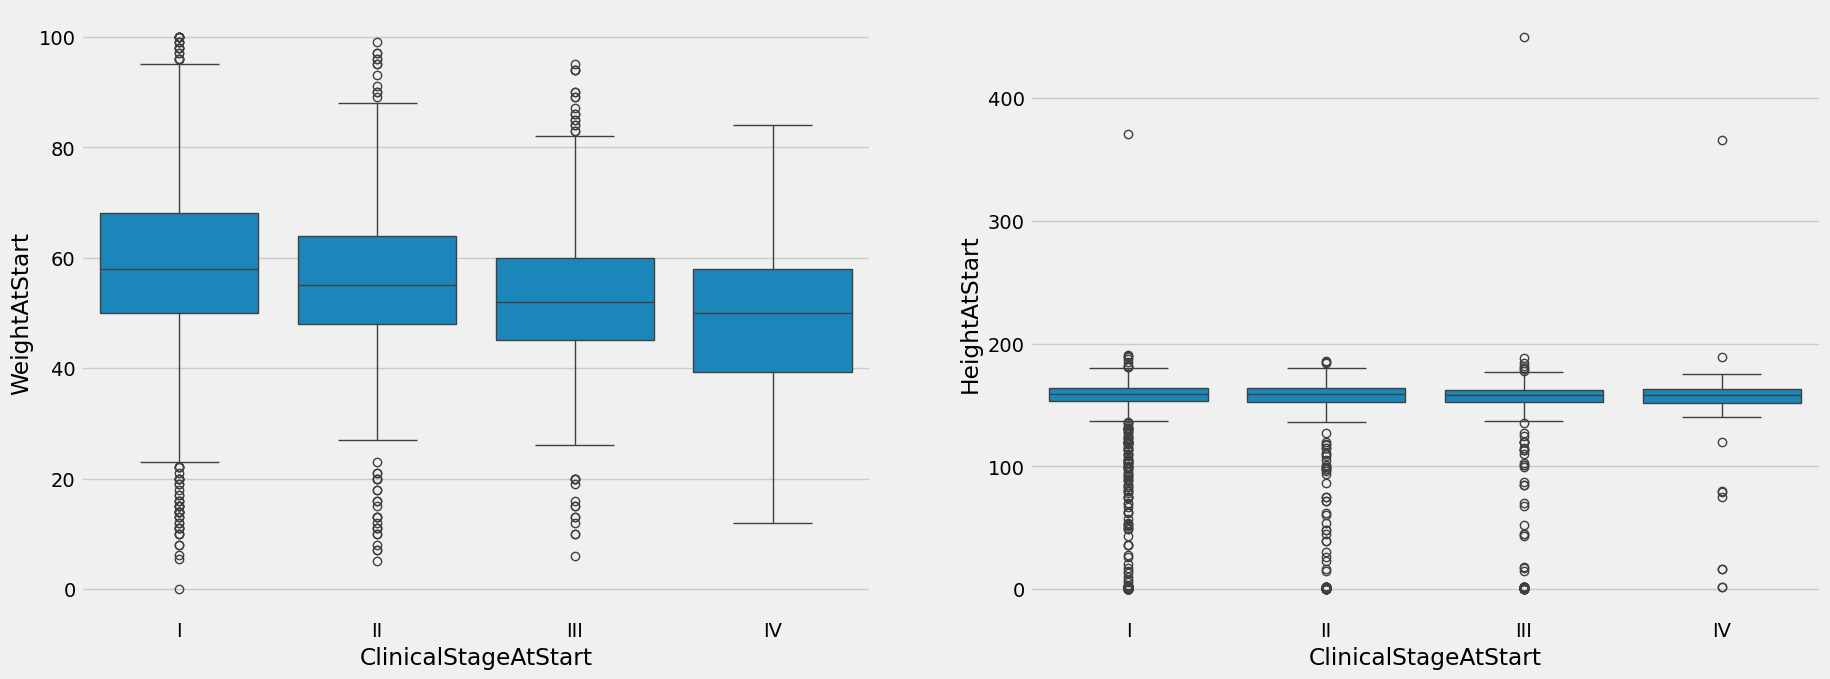

In [27]:
#Plotting the weight and height distribution for each cliical start stage
fig, ax = plt.subplots(1,2)
fig.set_size_inches([20,7.5])
sns.boxplot(x='ClinicalStageAtStart', y='WeightAtStart', data=clean_data, ax=ax[0])

sns.boxplot(x='ClinicalStageAtStart', y='HeightAtStart', data=clean_data, ax=ax[1])


plt.show()

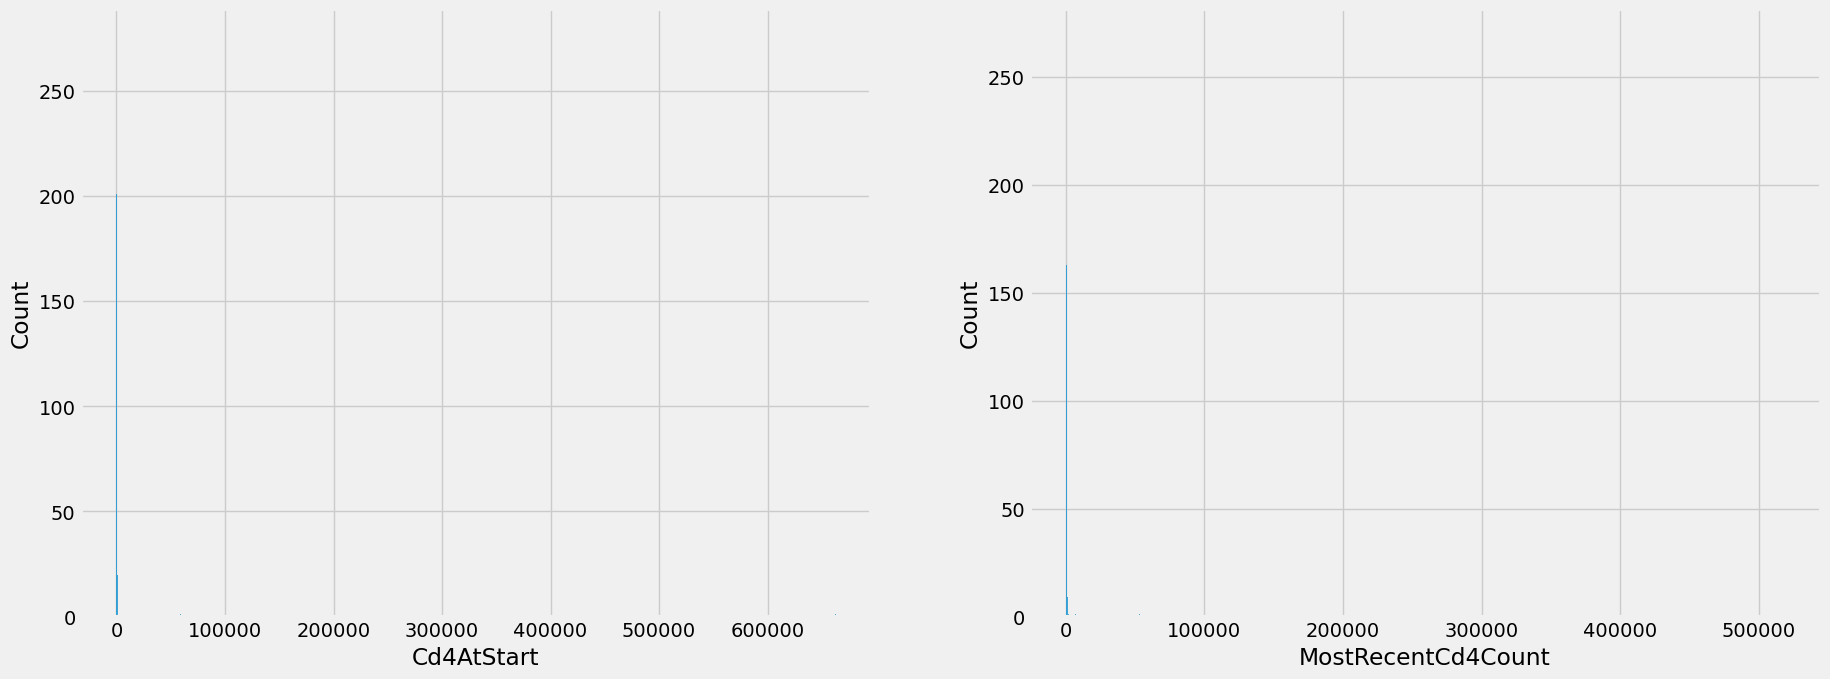

In [28]:
#Plotting the initial and recent cd4 count distribution
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1, 2)
fig.set_size_inches([20,7.5])
#plt.hist(clean_data.Age)
sns.histplot(clean_data, x = 'Cd4AtStart', ax= ax[0])
sns.histplot(clean_data, x = 'MostRecentCd4Count', ax = ax[1])
plt.show()

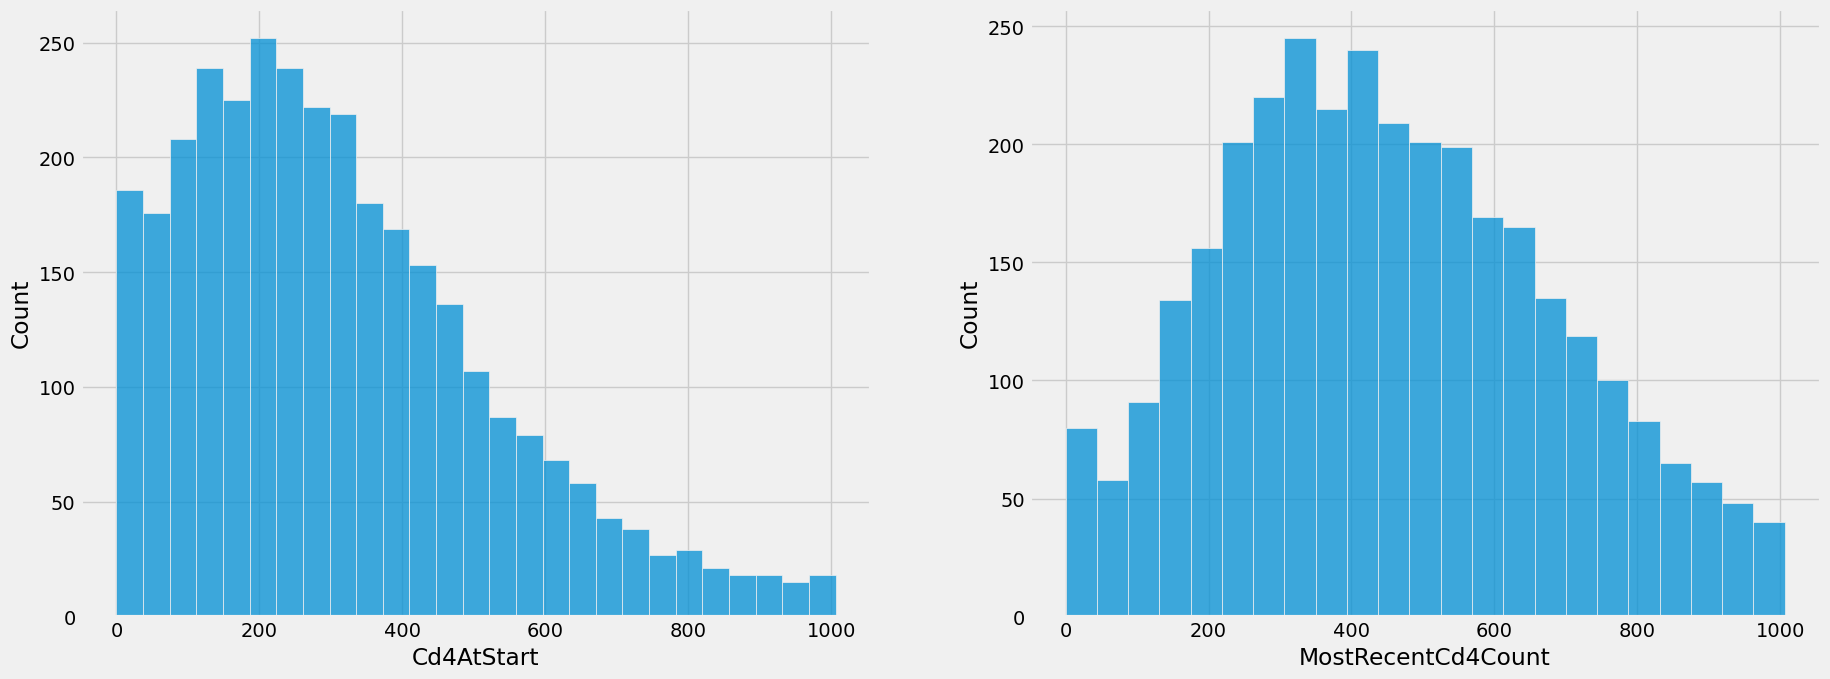

In [29]:
#Selecting the 97th percentile for the initial and recent cd4
percentile_97 = clean_data['Cd4AtStart'].quantile(0.975)
percentile_97_2 = clean_data['MostRecentCd4Count'].quantile(0.975)

# Remove the rows where the values in the initial and recent cd4 are greater than the 97th percentile value
clean_data = clean_data[(clean_data['Cd4AtStart'] <= percentile_97) & (clean_data['MostRecentCd4Count'] <= percentile_97)]

#Plotting the initial and recent cd4 count distribution
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1, 2)
fig.set_size_inches([20,7.5])
#plt.hist(clean_data.Age)
sns.histplot(clean_data, x = 'Cd4AtStart', ax= ax[0])
sns.histplot(clean_data, x = 'MostRecentCd4Count', ax = ax[1])
plt.show()




## Feature Engineering

In [31]:
#Filtering data for model training
model_data = clean_data[['FacilityType', 'Age', 'Sex', 'MaritalStatus',
       'EducationLevel', 'Occupation',
       'RegimenAtStart', 'WeightAtStart', 'HeightAtStart',  'ClinicalStageAtStart', 
    'AdherenceCouncelingCompleted',  'MostRecentCd4Count',
        'PregnancyStatus', 'ViralLoad']]

#Creating a dictionary to store label encoders
label_object = {}

cat_col = ['FacilityType', 'Sex', 'MaritalStatus',
       'EducationLevel', 'Occupation',
       'RegimenAtStart', 'ClinicalStageAtStart', 
    'AdherenceCouncelingCompleted',
        'PregnancyStatus']

#Creating label encoding object for all categorical columns
for feat in cat_col:
    le = LabelEncoder()
    le.fit(model_data[feat])
    model_data[feat] = le.fit_transform(model_data[feat])
    label_object[feat] = le
    joblib.dump(le,f'{feat}encoder.joblib')



print(model_data.info())
print(label_object)


<class 'pandas.core.frame.DataFrame'>
Index: 3230 entries, 1 to 17841
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   FacilityType                  3230 non-null   int32  
 1   Age                           3230 non-null   float64
 2   Sex                           3230 non-null   int32  
 3   MaritalStatus                 3230 non-null   int32  
 4   EducationLevel                3230 non-null   int32  
 5   Occupation                    3230 non-null   int32  
 6   RegimenAtStart                3230 non-null   int32  
 7   WeightAtStart                 3230 non-null   float64
 8   HeightAtStart                 3230 non-null   float64
 9   ClinicalStageAtStart          3230 non-null   int32  
 10  AdherenceCouncelingCompleted  3230 non-null   int32  
 11  MostRecentCd4Count            3230 non-null   float64
 12  PregnancyStatus               3230 non-null   int32  
 13  ViralLo

C:\Users\lexd4\AppData\Local\Temp\ipykernel_1876\350719333.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data[feat] = le.fit_transform(model_data[feat])
C:\Users\lexd4\AppData\Local\Temp\ipykernel_1876\350719333.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data[feat] = le.fit_transform(model_data[feat])
C:\Users\lexd4\AppData\Local\Temp\ipykernel_1876\350719333.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

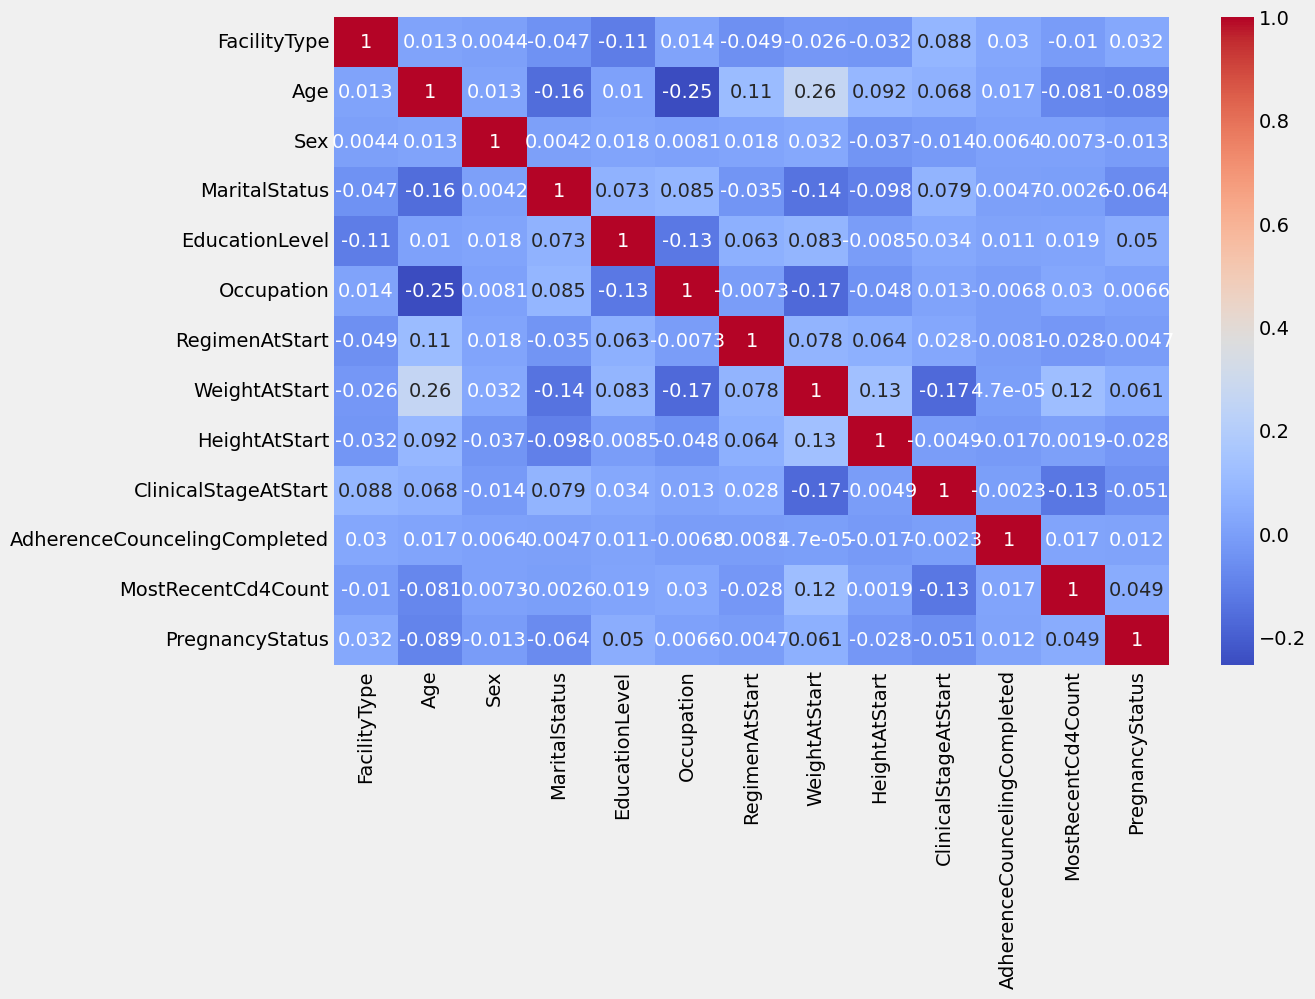

In [33]:
# Correlation matrix
corr_data = model_data[['FacilityType', 'Age', 'Sex', 'MaritalStatus',
       'EducationLevel', 'Occupation',
       'RegimenAtStart', 'WeightAtStart', 'HeightAtStart',  'ClinicalStageAtStart', 
    'AdherenceCouncelingCompleted',  'MostRecentCd4Count', 'PregnancyStatus']]
corr_matrix = corr_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Model Training

### cd4 count prediction

In [39]:
x = model_data[['FacilityType', 'Age', 'Sex', 'MaritalStatus',
       'EducationLevel', 'Occupation',
       'RegimenAtStart', 'WeightAtStart', 'HeightAtStart',  'ClinicalStageAtStart', 
    'AdherenceCouncelingCompleted', 
        'PregnancyStatus']]

y = model_data[['MostRecentCd4Count']]

#Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# List of regressors
models = {
    "KNeighborsRegressor": KNeighborsRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=0),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=500, random_state=42, criterion='friedman_mse'),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "SGDRegressor": SGDRegressor(),
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "SVR": SVR(),
    "XGBRegressor": XGBRegressor(),
    "MLPRegressor": MLPRegressor(max_iter=1000)
}

# Dictionary to store model performance
model_performance = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_performance[name] = {
        "Mean Absolute Error": mae,
        "Mean Squared Error": mse,
        "R2 Score": r2
    }

# Convert performance dictionary to DataFrame for better visualization
performance_df = pd.DataFrame(model_performance).T


# Display performance
print(performance_df)

C:\Users\lexd4\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\lexd4\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lexd4\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\lexd4\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

                           Mean Absolute Error  Mean Squared Error  \
KNeighborsRegressor               1.993878e+02        6.010718e+04   
CatBoostRegressor                 1.946857e+02        5.508050e+04   
RandomForestRegressor             1.922130e+02        5.417244e+04   
AdaBoostRegressor                 1.930332e+02        5.286561e+04   
GradientBoostingRegressor         1.900291e+02        5.230251e+04   
ExtraTreesRegressor               1.985309e+02        5.787264e+04   
SGDRegressor                      8.177383e+12        7.143384e+25   
LinearRegression                  1.906866e+02        5.252478e+04   
DecisionTreeRegressor             2.617327e+02        1.050111e+05   
SVR                               1.915433e+02        5.330400e+04   
XGBRegressor                      2.094549e+02        6.434078e+04   
MLPRegressor                      1.945456e+02        5.531639e+04   

                               R2 Score  
KNeighborsRegressor       -1.274760e-01  
CatBo

In [41]:
pickle.dump(models["GradientBoostingRegressor"], open('models\GradientBoost.pkl', 'wb'))
pickle.dump(models["AdaBoostRegressor"], open('models\AdaBoost.pkl', 'wb'))
pickle.dump(models["SVR"], open('models\SVR.pkl', 'wb'))

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\lexd4\AppData\Local\Temp\ipykernel_1876\2295227971.py:1: SyntaxWarning: invalid escape sequence '\G'
  pickle.dump(models["GradientBoostingRegressor"], open('models\GradientBoost.pkl', 'wb'))
C:\Users\lexd4\AppData\Local\Temp\ipykernel_1876\2295227971.py:2: SyntaxWarning: invalid escape sequence '\A'
  pickle.dump(models["AdaBoostRegressor"], open('models\AdaBoost.pkl', 'wb'))
C:\Users\lexd4\AppData\Local\Temp\ipykernel_1876\2295227971.py:3: SyntaxWarning: invalid escape sequence '\S'
  pickle.dump(models["SVR"], open('models\SVR.pkl', 'wb'))


### viral load prediction

In [42]:
#Creating dataset for training model on viral load prediction
viral_load = model_data.dropna(how = 'any')

x = viral_load[['FacilityType', 'Age', 'Sex', 'MaritalStatus',
       'EducationLevel', 'Occupation',
       'RegimenAtStart', 'WeightAtStart', 'HeightAtStart',  'ClinicalStageAtStart', 
    'AdherenceCouncelingCompleted',
        'PregnancyStatus']]

y = viral_load[['ViralLoad']]

#Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# List of regressors
models_viral = {
    "KNeighborsRegressor": KNeighborsRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=0),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=500, random_state=42, criterion='friedman_mse'),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "SGDRegressor": SGDRegressor(),
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "SVR": SVR(),
    "XGBRegressor": XGBRegressor(),
    "MLPRegressor": MLPRegressor(max_iter=1000)
}

# Dictionary to store model performance
model_performance_viral = {}

# Train and evaluate each model
for name, model in models_viral.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_performance_viral[name] = {
        "Mean Absolute Error": mae,
        "Mean Squared Error": mse,
        "R2 Score": r2
    }

# Convert performance dictionary to DataFrame for better visualization
performance_df = pd.DataFrame(model_performance_viral).T

# Display performance
print(performance_df)

C:\Users\lexd4\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\lexd4\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lexd4\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\lexd4\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

                           Mean Absolute Error  Mean Squared Error  \
KNeighborsRegressor               1.323678e+04        4.467239e+09   
CatBoostRegressor                 2.229093e+04        1.284478e+10   
RandomForestRegressor             2.091995e+04        1.093648e+10   
AdaBoostRegressor                 1.906820e+04        3.682711e+09   
GradientBoostingRegressor         1.603945e+04        2.370463e+09   
ExtraTreesRegressor               1.397498e+04        2.529508e+09   
SGDRegressor                      3.481213e+12        1.264113e+25   
LinearRegression                  1.168851e+04        8.960585e+08   
DecisionTreeRegressor             2.232929e+04        4.068960e+10   
SVR                               3.631928e+03        8.387032e+08   
XGBRegressor                      1.506010e+04        6.777905e+09   
MLPRegressor                      1.085380e+04        8.634446e+08   

                               R2 Score  
KNeighborsRegressor       -4.411428e+00  
CatBo

C:\Users\lexd4\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
pickle.dump(models["LinearRegression"], open('models\LinearRegression.pkl', 'wb'))
pickle.dump(models["MLPRegressor"], open('models\MLP.pkl', 'wb'))
pickle.dump(models["SVR"], open('models\SVRviral.pkl', 'wb'))

<>:1: SyntaxWarning: invalid escape sequence '\L'
<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\L'
<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\lexd4\AppData\Local\Temp\ipykernel_1876\1885794352.py:1: SyntaxWarning: invalid escape sequence '\L'
  pickle.dump(models["LinearRegression"], open('models\LinearRegression.pkl', 'wb'))
C:\Users\lexd4\AppData\Local\Temp\ipykernel_1876\1885794352.py:2: SyntaxWarning: invalid escape sequence '\M'
  pickle.dump(models["MLPRegressor"], open('models\MLP.pkl', 'wb'))
C:\Users\lexd4\AppData\Local\Temp\ipykernel_1876\1885794352.py:3: SyntaxWarning: invalid escape sequence '\S'
  pickle.dump(models["SVR"], open('models\SVRviral.pkl', 'wb'))


## Done

In [38]:
data = data[['FacilityType', 'Age', 'Sex', 'MaritalStatus',
       'EducationLevel', 'Occupation', 
       'RegimenAtStart', 'WeightAtStart', 'HeightUnit', 'HeightAtStart', 'ClinicalStageAtStart', 
       'Cd4AtStart', 'AdherenceCouncelingCompleted', 'InitialTbScreeningDone', 
       'ClinicalStageAtLastVisit', 'PatientDead',
       'AnySideEffects', 
       'MostRecentCd4Count', 'PregnancyStatus', 'CurrentRegimen',
       'ViralLoad']].dropna(how = 'any')


#correcting the spelling issue with the pregnancy status column
clean_data['PregnancyStatus'] = np.where(clean_data['PregnancyStatus']=='Non-oregnancy', 'Not Pregnant', clean_data['PregnancyStatus'])

#Filtering out rows with age higher than 100
clean_data = clean_data[clean_data['Age']<=100]

data['ViralLoad'] = data['ViralLoad'].str.replace(r'[^0-9]', '', regex=True)
data['ViralLoad'] = pd.to_numeric(data['ViralLoad'])
data = data.dropna(how = 'any')
data.to_csv('data.csv')